In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

delete_last_char = lambda s: s[:-1]


### Reading data

In [2]:
vs1 = pd.read_csv('raw_data/control_1_variants_0_001.csv')
vs2 = pd.read_csv('raw_data/control_2_variants_0_001.csv')
vs3 = pd.read_csv('raw_data/control_3_variants_0_001.csv')
roommate_vs = pd.read_csv('raw_data/VarScan_results_0_001.csv')

vs1['frequency'] = vs1['frequency'].apply(delete_last_char).apply(float)
vs2['frequency'] = vs2['frequency'].apply(delete_last_char).apply(float)
vs3['frequency'] = vs3['frequency'].apply(delete_last_char).apply(float)
roommate_vs['frequency'] = roommate_vs['frequency'].apply(delete_last_char).apply(float)

## Let's look at positions of varians and they frequencies distribution

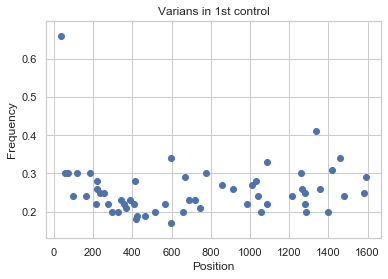

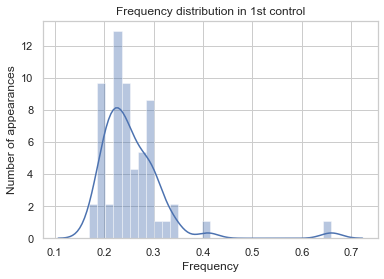

In [3]:
plt.scatter(vs1['position'], vs1['frequency'])

plt.title('Varians in 1st control')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()


fig, axs = plt.subplots(1,1)
sns.distplot(vs1['frequency'], bins=30)

plt.title('Frequency distribution in 1st control')
plt.xlabel('Frequency')
plt.ylabel('Number of appearances')
plt.show()

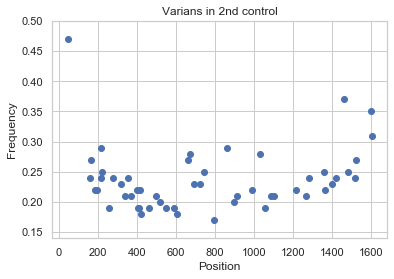

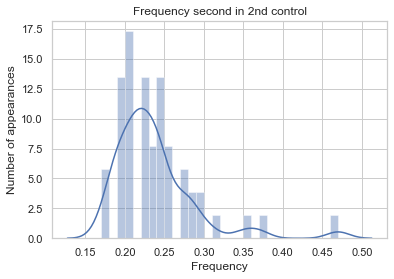

In [4]:
plt.scatter(vs2['position'], vs2['frequency'])

plt.title('Varians in 2nd control')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()


fig, axs = plt.subplots(1,1)
sns.distplot(vs2['frequency'], bins=30)

plt.title('Frequency second in 2nd control')
plt.xlabel('Frequency')
plt.ylabel('Number of appearances')
plt.show()

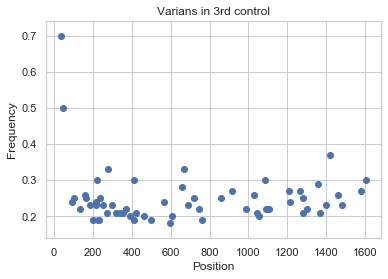

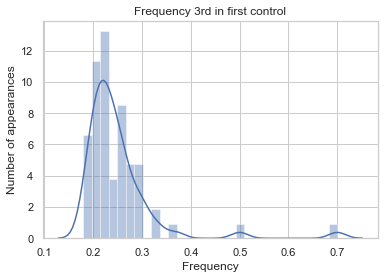

In [5]:
plt.scatter(vs3['position'], vs3['frequency'])

plt.title('Varians in 3rd control')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()


fig, axs = plt.subplots(1,1)
sns.distplot(vs3['frequency'], bins=30)

plt.title('Frequency 3rd in first control')
plt.xlabel('Frequency')
plt.ylabel('Number of appearances')
plt.show()

## Calculate averages and standard deviations

Since there are no high-frequency mutations, we can just calculate average and deviation with the whole dataset.

In [6]:
print('Varians in 1st control')
print('Average:', np.mean(vs1['frequency']))
print('Deviation:', np.std(vs1['frequency']))
print()

print('Varians in 2nd control')
print('Average:', np.mean(vs2['frequency']))
print('Deviation:', np.std(vs2['frequency']))
print()

print('Varians in 3rd control')
print('Average:', np.mean(vs3['frequency']))
print('Deviation:', np.std(vs3['frequency']))

Varians in 1st control
Average: 0.25649122807017544
Deviation: 0.07109398839712917

Varians in 2nd control
Average: 0.23692307692307704
Deviation: 0.05187034359225605

Varians in 3rd control
Average: 0.2503278688524591
Deviation: 0.0773954548823238


## Merging controls and calculate again

Since controls are similar, we can merge them and calculate overall average and deviation. 

In [7]:
vs = pd.concat([vs1, vs2, vs3])

average = np.mean(vs['frequency'])
deviation = np.std(vs['frequency'])

print('Varians in all controls')
print('Average:', average)
print('Deviation:', deviation)

Varians in all controls
Average: 0.24829411764705883
Deviation: 0.06877949823285008


## Cheking if roommate's varians are statistically significant

In [8]:
is_significant = lambda row: row['frequency'] < average - 3 * deviation or row['frequency'] > average + 3 * deviation

roommate_vs['significant'] = roommate_vs.apply(is_significant, axis=1)

## Epitopes

In [9]:
epitopes = {
    'A': {122, 124, 126, 130, 131, 132, 133, 135, 137, 138, 140, 142, 143, 144, 145, 146, 150, 152, 168},
    'B': {128, 129,155, 156, 157, 158, 159, 160, 163, 165, 186, 187, 188, 189, 190, 192, 193, 194, 196, 197, 198},
    'C': {44, 45, 46, 47, 48, 50, 51, 53, 54, 273, 275, 276, 278, 279, 280, 294, 297, 299, 300, 304, 305, 307, 308, 309, 310, 311, 312},
    'D': {96,102,103,117,121,167,170, 171, 172, 173, 174, 175, 176, 177, 179,182, 201, 203, 207, 208, 209, 212, 213, 214, 215, 216, 217, 218, 219, 226, 227, 228, 229, 230, 238, 240, 242, 244, 246, 247, 248, 249, 248},
    'E': {57, 59, 62, 63, 67, 75, 78, 80, 81, 82, 83, 86, 87, 88, 91, 92, 94, 109, 260, 261, 262, 265}
}

def is_in_epitope(row):
    ans = ''
    for epitope, epitope_positions in epitopes.items():
        if row['position'] in epitope_positions:
            ans = epitope
    return ans

roommate_vs['epitope'] = roommate_vs.apply(is_in_epitope, axis=1)

## Writing results

In [10]:
roommate_vs.to_csv('raw_data/VarScan_results_0_001_with_significance_and_epitopes.csv', sep=',', index=False)